In [1]:
import numpy as np

## Task 5

$$
\begin{gathered}
A=\left[\begin{array}{cc}
1 & 1 \\
1 & 1+t \\
1 & 1+t
\end{array}\right], \quad b=\left[\begin{array}{c}
2 \\
t \\
4+t
\end{array}\right] , \quad t = 10^{-5} \\
\end{gathered}
$$

$$
x=\left(A^T A\right)^{-1} A^T b .
$$

$$
\begin{gathered}
M = A^T A = \left[\begin{array}{cc}
3 & 3+2t \\
3+2t & 3+4t+2t^2
\end{array}\right],

\quad M^{-1} = \frac{1}{det M} \left[\begin{array}{cc}
3+4t+2t^2 & -(3+2t) \\
-(3+2t) & 3
\end{array}\right],

\quad A^T b = \left[\begin{array}{cc}
6+2t \\
6+6t+2t^2
\end{array}\right]
\end{gathered}
$$

$$
x = \frac{1}{2t^2}\left[\begin{array}{cc}
2t^2 \\
2t^2
\end{array}\right] = \left[\begin{array}{cc}
1 \\
1
\end{array}\right]

$$


In [2]:
# analytical solution
x = np.array([1,1])

def solution(A, b):
    A_t = A.T
    inv = np.linalg.inv(A_t.dot(A))
    return inv.dot(A_t.dot(b))

A = np.array([[1, 1],[1, 1+10**-5],[1, 1+10**-5]], dtype=np.float32)
b = np.array([2, 10**-5, 4 + 10**-5], dtype=np.float32)

# single precision
print('Single precision difference', solution(A,b) - x)

A = np.array(A, dtype=np.float64)
b = np.array(b, dtype=np.float64)
print('Double precision difference', solution(A,b) - x)

Single precision difference [-1. -1.]
Double precision difference [ 0.00065094 -0.0006806 ]


In [3]:
def svd_solution(A, b):
    # SVD decomposition
    u, s, vh = np.linalg.svd(A, full_matrices=False)
    # x_ = vh @ x (new basis)
    # b_ = u.T @ b
    b_ = u.T @ b
    x_ = np.linalg.solve(np.diag(s), b_)
    return vh.T @ x_

print('SVD Solution', svd_solution(A, b))
print('Difference with analytical solution', svd_solution(A, b)-x)

SVD Solution [1.00067811 0.99932189]
Difference with analytical solution [ 0.00067811 -0.00067811]


##### A-matrix has determinant close to zero and therefore big condition number, that is why SVD-based algorythm is more numerically stable.

##### To demonstrate it, lets try it with single precision (where regular approach was unstable)



In [4]:
A = np.array(A, dtype=np.float32)
b = np.array(b, dtype=np.float32)

print('SVD Solution', svd_solution(A, b))
print('Difference with analytical solution', svd_solution(A, b)-x)

SVD Solution [0.9999966 1.0000032]
Difference with analytical solution [-3.39746475e-06  3.21865082e-06]


In [5]:
x_lstsq, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print('np.linalg.lstsq Solution' ,x_lstsq)
print('Difference with analytical solution', x_lstsq-x)

np.linalg.lstsq Solution [1.0006781 0.9993219]
Difference with analytical solution [ 0.00067806 -0.00067812]


##### np.linalg.lstsq is exactly the same as scipy.lstsq, which uses SVD from LAPACK, as it could be seen in the source code:

https://github.com/scipy/scipy/blob/v1.9.3/scipy/linalg/_basic.py#L1024-L1223

##### Moreover, our SVD-based solution returns exactly the same result as SVD-based algorythm with double-precision.


##### Four condition numbers from the Theorem 18.1 are describing the sensitivities of $y$ and $x$ to perturbations in $b-vector$ and $A-matrix$.

$$
1. \frac{1}{\cos \theta},
\quad
2. \frac{\kappa(A)}{\eta \cos \theta},
\quad
3. \frac{\kappa(A)}{\cos \theta},
\quad
4.\ \kappa(A)+\frac{\kappa(A)^2 \tan \theta}{\eta}
$$

$$
where \quad
\kappa(A)= \Vert A \Vert \Vert A^T \Vert
, \quad
\theta=\cos ^{-1} \frac{\|y\|}{\|b\|}
, \quad
\eta=\frac{\|A\|\|x\|}{\|y\|}=\frac{\|A\|\|x\|}{\|A x\|} .
$$

In [6]:
delta_b = np.array([-10**-5, -0, -0])
x_= svd_solution(A, b+delta_b)
N = lambda v : np.linalg.norm(v)
print(N(x_- x) * N(b) / N(x) / N(delta_b))

450126.14121396595


## Task 6

$$
A=\left[\begin{array}{cc}
\epsilon & 1 & 0\\
1 & 1 & 1\\
0 & 1 & 1
\end{array}\right]
$$
##### Firstly, let us perform LU decomposition without pivoting by solving system of linear equations, considering that diagonal of L-matrix is $(1, 1, 1)$
$$
A=\left[\begin{array}{cc}
1 & 0 & 0\\
l_{21} & 1 & 0\\
l_{31} & l_{32} & 1
\end{array}\right]

\left[\begin{array}{cc}
u_{11} & u_{12} & u_{13}\\
0 & u_{22} & u_{23}\\
0 & 0 & u_{33}
\end{array}\right]
$$

$$
\begin{gathered}
1st\ row:\ 1 * u_{11} = \epsilon, \quad 1 * u_{12} = 1, \quad 1 * u_{13}
\end{gathered}
$$
$$
\begin{gathered}
2nd\ row:\ l_{21} * \epsilon = 1, \quad l_{21} * u_{12} = 1, \quad l_{22} * u_{23} = 1
\end{gathered}
$$
$$
\begin{gathered}
3rd\ row:\ l_{31} * \epsilon = 0, \quad l_{32} * u_{22} = 1, \quad l_{32} * 1 + u_{33} = 1
\end{gathered}
$$

$$
Therefore \quad LU=\left[\begin{array}{cc}
1 & 0 & 0\\
\frac{1}{\epsilon} & 1 & 0\\
0 & \frac{\epsilon}{\epsilon - 1} & 1
\end{array}\right]

\left[\begin{array}{cc}
\epsilon & 1 & 0\\
0 & 1 - \frac{1}{\epsilon} & 1\\
0 & 0 & \frac{1}{1 - \epsilon}
\end{array}\right]
$$

##### Secondly, LU decomposition with partial pivoting

$$
step\ 1:\ \left[\begin{array}{cc}
1 & 1 & 1\\
0 & 1 & 1\\
\epsilon & 1 & 0
\end{array}\right] = P_{23}P_{12}A; \quad

step\ 2:\ \left[\begin{array}{cc}
1 & 1 & 1\\
0 & 1 & 1\\
0 & 1-\epsilon & -\epsilon
\end{array}\right] = M_1 P_{23}P_{12}A; \quad
$$
$$
step\ 3:\ \left[\begin{array}{cc}
1 & 1 & 1\\
0 & 1 & 1\\
0 & 1-\epsilon & -\epsilon
\end{array}\right] = M_1 P_{23}P_{12}A; \quad

step\ 4:\ \left[\begin{array}{cc}
1 & 1 & 1\\
0 & 1 & 1\\
0 & 0 & -1
\end{array}\right] = M_2 M_1 P_{23} P_{12} A = U \quad
$$

$$
P_{23} = \left[\begin{array}{cc}
1 & 0 & 0\\
0 & 0 & 1\\
0 & 1 & 0
\end{array}\right]; \quad

P_{12} = \left[\begin{array}{cc}
0 & 1 & 0\\
1 & 0 & 1\\
0 & 0 & 1
\end{array}\right]; \quad

P = P_{23} P_{12} = \left[\begin{array}{cc}
0 & 1 & 0\\
0 & 0 & 1\\
1 & 0 & 0
\end{array}\right]
$$


$$
M_{1} = \left[\begin{array}{cc}
1 & 0 & 0\\
0 & 1 & 0\\
-\epsilon & 0 & 1
\end{array}\right]; \quad

M_{2} = \left[\begin{array}{cc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & -1+\epsilon & 1
\end{array}\right]; \quad

M = M_{2} M_{1} = \left[\begin{array}{cc}
1 & 0 & 0\\
0 & 1 & 0\\
-\epsilon & \epsilon-1 & 1
\end{array}\right]
$$

$$ M_2 M_1 P_{23} P_{12} A = U $$
$$ M P A = U $$
$$ PA = LU ,\quad where\ L=M^{-1} $$

$$
U = \left[\begin{array}{cc}
1 & 1 & 1\\
0 & 1 & 1\\
0 & 0 & -1
\end{array}\right], \quad

L = \left[\begin{array}{cc}
1 & 0 & 0\\
0 & 1 & 0\\
\epsilon & 1-\epsilon & 1
\end{array}\right], \quad

P = \left[\begin{array}{cc}
0 & 1 & 0\\
0 & 0 & 1\\
1 & 0 & 0
\end{array}\right], \quad
$$

If we apply simple Gaussian elimination ofr computing LU decomposition of matrix A
$$
A=\left[\begin{array}{cc}
10^{-20} & 1 \\
1 & 1
\end{array}\right] .
$$
then $10^{20}$ times the first row is subtracted from the second row, and the following factors are produced:
$$
L=\left[\begin{array}{cc}
1 & 0 \\
10^{20} & 1
\end{array}\right], \quad U=\left[\begin{array}{cc}
10^{-20} & 1 \\
0 & 1-10^{20}
\end{array}\right] .
$$
If these computations are performed in floating point arithmetic with $10^{-16}$ accuracy limit. The number $1-10^{20}$ will not be represented exactly; it will be rounded to the nearest floating point number. Matrices produced by the algorithm will be
$$
\tilde{L}=\left[\begin{array}{cc}
1 & 0 \\
10^{20} & 1
\end{array}\right], \quad \tilde{U}=\left[\begin{array}{cc}
10^{-20} & 1 \\
0 & -10^{20}
\end{array}\right] .
$$
The matrix apparent when computing the product $\tilde{L} \tilde{U}$ :
$$
\tilde{L} \tilde{U}=\left[\begin{array}{cc}
10^{-20} & 1 \\
1 & 0
\end{array}\right] .
$$
This matrix is not at all close to $A$

## Task 7

In [11]:
from mpmath import mp, mpf
from matplotlib import pyplot as plt

def foo(n, a):
    f = np.zeros(n, dtype=np.float64)
    f[0] = np.log(1 + 1/np.float64(a))
    for i in range(1, n):
        f[i] = 1/np.float64(i) - np.float64(a) * f[i-1]
    return f

def mp_foo(n, a):
    mp.dps = 64
    f = mp.zeros(1, n)
    f[0] = mp.log(1 + 1/mpf(a))
    for i in range(1, n):
        f[i] = 1/mpf(i) - mpf(a) * f[i-1]
    return f

def plot_diff(n, a):
    plt.figure(figsize=(10, 6))
    plt.plot((foo(n, a) - mp_foo(n, a)) / np.finfo(float).eps, 'o')
    plt.show()

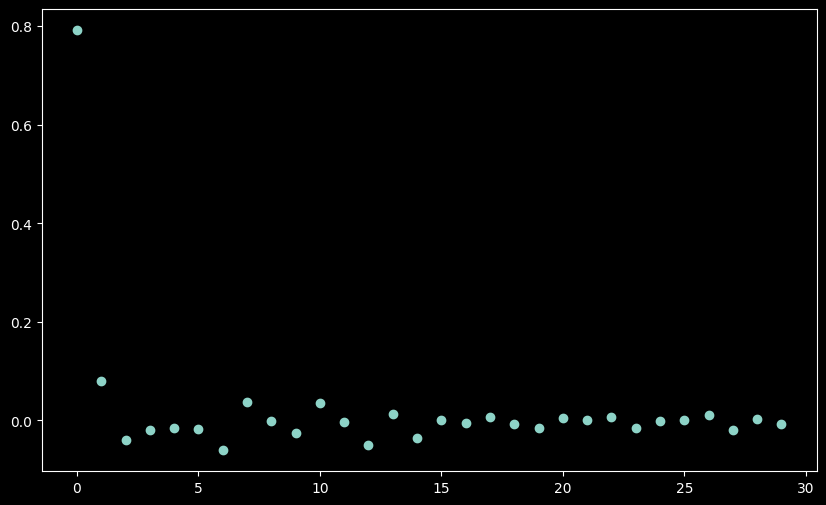

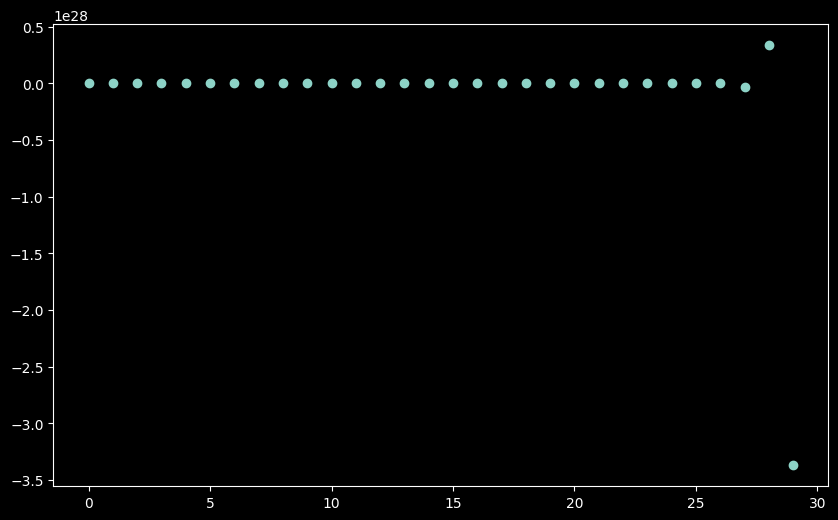

In [12]:
plt.style.use('dark_background')
plot_diff(30, 0.1)
plot_diff(30, 10)

In [7]:
''' TASK 3'''

def solve_quad(b,c):
    d = b**2 - 4*c
    root = np.sqrt(abs(d))
    if d < 0:
        return (b + 1j*root)/2, (b - 1j*root)/2
    elif d == 0:
        return b/2, b/2
    else:
        return (b + root)/2, (b - root)/2

In [8]:
tests = [{ 'b': 4.0 , 'c': 3.0} ,
        { 'b': 2.0 , 'c' : 1.0} ,
        { 'b': 0.5 , 'c': 4.0} ,
        { 'b': 1e10 , 'c': 3.0} ,
        { 'b': -1e10 , 'c': 4.0}]


for inp in tests:
    b = inp['b']
    c = inp['c']
    print(solve_quad(b,c))

(3.0, 1.0)
(1.0, 1.0)
((0.25+1.984313483298443j), (0.25-1.984313483298443j))
(10000000000.0, 0.0)
(0.0, -10000000000.0)
